In [3]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Reading data file
df = pd.read_csv('train_reg.csv')

In [5]:
df_test = pd.read_csv('test_house.csv')

In [6]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df_cont = df.select_dtypes(include=numerics)
df_cat = df.select_dtypes(include = 'object')

In [7]:
df_cont_test = df_test.select_dtypes(include=numerics)
df_cat_test = df_test.select_dtypes(include = 'object')

In [8]:
df.shape

(1460, 81)

In [9]:
df_cont.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [10]:
#impute a number for no garage
df_cont['GarageYrBlt'] = df_cont['GarageYrBlt'].fillna(9999)
df_cont = df_cont.fillna(df_cont.median())

In [11]:
#Removing a column
df_cont.drop(['Id'], axis=1, inplace=True)

In [12]:
df_cont = df_cont.loc[:, df_cont.columns != 'SalePrice']
cols = df_cont.columns
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
df_cont = ms.fit_transform(df_cont)
df_cont = pd.DataFrame(df_cont, columns=[cols])

In [13]:
#impute a number for no garage
df_cont_test['GarageYrBlt'] = df_cont_test['GarageYrBlt'].fillna(9999)
df_cont_test = df_cont_test.fillna(df_cont_test.median())

#Removing a column
df_cont_test.drop(['Id'], axis=1, inplace=True)

df_cont_test = df_cont_test.loc[:, df_cont_test.columns != 'SalePrice']
cols = df_cont_test.columns
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
df_cont_test = ms.fit_transform(df_cont_test)
df_cont_test = pd.DataFrame(df_cont_test, columns=[cols])

(array([3.13883346e-07, 1.08432429e-06, 2.82495011e-06, 6.62008511e-06,
        7.79001394e-06, 6.22059722e-06, 5.02213353e-06, 2.96762436e-06,
        2.65374101e-06, 1.65502128e-06, 1.19846368e-06, 9.98719736e-07,
        6.84836391e-07, 2.85348496e-07, 4.85092443e-07, 2.28278797e-07,
        1.99743947e-07, 1.14139398e-07, 5.70696992e-08, 2.85348496e-08,
        2.85348496e-08, 5.70696992e-08, 2.85348496e-08, 0.00000000e+00,
        5.70696992e-08, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 5.70696992e-08]),
 array([ 34900.        ,  58903.33333333,  82906.66666667, 106910.        ,
        130913.33333333, 154916.66666667, 178920.        , 202923.33333333,
        226926.66666667, 250930.        , 274933.33333333, 298936.66666667,
        322940.        , 346943.33333333, 370946.66666667, 394950.        ,
        418953.33333333, 442956.66666667, 466960.        , 490963.33333333,
        514966.66666667, 538970.        , 562973.33333333, 586976.66666667

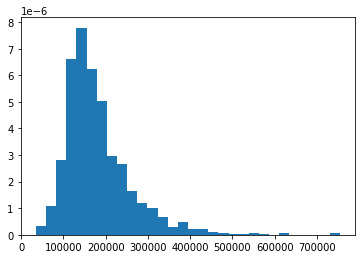

In [14]:
plt.hist(df['SalePrice'], density=True, bins=30)  # density=False would make counts

(array([0.02005179, 0.01336786, 0.        , 0.01336786, 0.02005179,
        0.04678751, 0.03341965, 0.0668393 , 0.26067328, 0.23393756,
        0.32751258, 0.66839303, 0.92238238, 1.24321104, 0.97585382,
        1.04269313, 0.9491181 , 0.68176089, 0.66839303, 0.45450726,
        0.34756438, 0.29409293, 0.14704647, 0.16041433, 0.08020716,
        0.02673572, 0.02005179, 0.02005179, 0.00668393, 0.01336786]),
 array([10.46024211, 10.56271647, 10.66519084, 10.7676652 , 10.87013956,
        10.97261393, 11.07508829, 11.17756266, 11.28003702, 11.38251138,
        11.48498575, 11.58746011, 11.68993448, 11.79240884, 11.8948832 ,
        11.99735757, 12.09983193, 12.2023063 , 12.30478066, 12.40725502,
        12.50972939, 12.61220375, 12.71467812, 12.81715248, 12.91962684,
        13.02210121, 13.12457557, 13.22704994, 13.3295243 , 13.43199866,
        13.53447303]),
 <BarContainer object of 30 artists>)

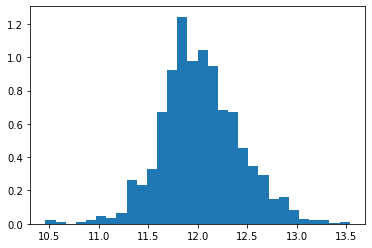

In [15]:
plt.hist(np.log(df['SalePrice']), density=True, bins=30)

In [16]:
df_response = np.log(df['SalePrice']) 

In [17]:
#lasso with lasso cv

X_lasso = df_cont
y = df_response

from sklearn.model_selection import KFold
from sklearn.linear_model import LassoCV

cv = KFold(n_splits=10, shuffle=True, random_state=10)
model = LassoCV(cv=cv)
lassocv = model.fit(X_lasso, y)

B_lasso = lassocv.coef_
B_lasso = np.insert(B_lasso, 0, lassocv.intercept_, axis=0)

print('The Coef are')
print(B_lasso)
#print('\nlambda best is = %f' % lassocv.alpha_)

The Coef are
[ 1.05559339e+01 -1.24237040e-01  0.00000000e+00  4.63435582e-02
  8.10180192e-01  3.11560178e-01  3.37773504e-01  8.57757473e-02
  0.00000000e+00  5.36495070e-02  0.00000000e+00 -0.00000000e+00
  2.03969839e-01  1.05857349e-01  0.00000000e+00 -0.00000000e+00
  8.78222650e-01  2.03441579e-01  6.02904245e-03  1.05506646e-01
  3.41439019e-02  0.00000000e+00 -0.00000000e+00  1.25303150e-01
  1.74117164e-01 -1.96327691e-02  2.74315786e-01  3.08013719e-02
  9.30304370e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.06181878e-01 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -2.02275795e-02]


In [18]:
#lasso with lasso cv

X_lasso = df_cont
y = df_response

from sklearn.model_selection import KFold
from sklearn.linear_model import LassoCV

cv = KFold(n_splits=10, shuffle=True, random_state=10)
model = LassoCV(cv=cv)
lassocv = model.fit(X_lasso, y)

B_lasso = lassocv.coef_
B_lasso = np.insert(B_lasso, 0, lassocv.intercept_, axis=0)

print('The Coef are')
print(B_lasso)
#print('\nlambda best is = %f' % lassocv.alpha_)

The Coef are
[ 1.05559339e+01 -1.24237040e-01  0.00000000e+00  4.63435582e-02
  8.10180192e-01  3.11560178e-01  3.37773504e-01  8.57757473e-02
  0.00000000e+00  5.36495070e-02  0.00000000e+00 -0.00000000e+00
  2.03969839e-01  1.05857349e-01  0.00000000e+00 -0.00000000e+00
  8.78222650e-01  2.03441579e-01  6.02904245e-03  1.05506646e-01
  3.41439019e-02  0.00000000e+00 -0.00000000e+00  1.25303150e-01
  1.74117164e-01 -1.96327691e-02  2.74315786e-01  3.08013719e-02
  9.30304370e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.06181878e-01 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -2.02275795e-02]


In [19]:
df_cont

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.122500,0.125089,0.000000,...,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.00000,0.090909,0.50
1,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.000000,0.173281,0.000000,...,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.363636,0.25
2,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.101250,0.086109,0.000000,...,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.00000,0.727273,0.50
3,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.000000,0.038271,0.000000,...,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.00000,0.090909,0.00
4,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.218750,0.116052,0.000000,...,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.00000,1.000000,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,0.140411,0.030929,0.555556,0.500,0.920290,0.833333,0.000000,0.000000,0.000000,...,0.324401,0.000000,0.073126,0.000000,0.0,0.0,0.0,0.00000,0.636364,0.25
1456,0.000000,0.219178,0.055505,0.555556,0.625,0.768116,0.633333,0.074375,0.139972,0.110583,...,0.352609,0.407235,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.090909,1.00
1457,0.294118,0.154110,0.036187,0.666667,1.000,0.500000,0.933333,0.000000,0.048724,0.000000,...,0.177715,0.000000,0.109689,0.000000,0.0,0.0,0.0,0.16129,0.363636,1.00
1458,0.000000,0.160959,0.039342,0.444444,0.625,0.565217,0.766667,0.000000,0.008682,0.698100,...,0.169252,0.427071,0.000000,0.202899,0.0,0.0,0.0,0.00000,0.272727,1.00


In [20]:
df_cont2 =  df_cont * lassocv.coef_
df_cont2 = df_cont2.loc[:, (df_cont2 != 0).any(axis=0)]
df_cont2

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,...,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,ScreenPorch,YrSold
0,-0.029232,0.001549,0.54012,0.155780,0.320640,0.075769,0.006711,0.028576,0.012680,0.227663,...,0.070338,0.017072,0.062652,0.000000,-0.000250,0.137158,0.011903,0.000000,0.0,-0.010114
1,-0.000000,0.001798,0.45010,0.272615,0.254554,0.037169,0.009296,0.042129,0.022541,0.153540,...,0.070338,0.000000,0.041768,0.058039,-0.000184,0.137158,0.009992,0.032349,0.0,-0.005057
2,-0.029232,0.002155,0.54012,0.155780,0.315745,0.074339,0.004620,0.030712,0.014234,0.240237,...,0.070338,0.017072,0.041768,0.058039,-0.000245,0.137158,0.013207,0.000000,0.0,-0.010114
3,-0.036540,0.001787,0.54012,0.155780,0.105248,0.028592,0.002053,0.025238,0.015230,0.228821,...,0.035169,0.000000,0.052210,0.058039,-0.000238,0.205737,0.013945,0.000000,0.0,-0.000000
4,-0.029232,0.002807,0.63014,0.155780,0.313297,0.071480,0.006226,0.038223,0.019699,0.308404,...,0.070338,0.017072,0.073094,0.058039,-0.000242,0.205737,0.018159,0.020842,0.0,-0.010114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.029232,0.001433,0.45010,0.155780,0.310850,0.071480,0.000000,0.031814,0.015036,0.217239,...,0.070338,0.017072,0.052210,0.058039,-0.000240,0.137158,0.009992,0.000000,0.0,-0.005057
1456,-0.000000,0.002572,0.45010,0.194725,0.259449,0.054325,0.007509,0.051477,0.042241,0.287722,...,0.070338,0.000000,0.052210,0.116078,-0.000189,0.137158,0.010861,0.037885,0.0,-0.020228
1457,-0.036540,0.001677,0.54012,0.311560,0.168887,0.080057,0.002614,0.038457,0.020744,0.331898,...,0.070338,0.000000,0.073094,0.116078,-0.000099,0.068579,0.005474,0.000000,0.0,-0.020228
1458,-0.000000,0.001823,0.36008,0.194725,0.190915,0.065761,0.000466,0.035987,0.018072,0.123097,...,0.035169,0.000000,0.031326,0.000000,-0.000121,0.068579,0.005213,0.039731,0.0,-0.020228


In [21]:
def outliers (dataframe):
    
    for column in dataframe:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        Lower_Bound = Q1 - 1.5*IQR
        Upper_Bound = Q3 + 1.5*IQR
        
        for i in np.linspace(0,len(dataframe[column])-1, len(dataframe[column])):
            if dataframe[column][i] < Lower_Bound:
                dataframe[column][i] = Q1
            elif dataframe[column][i] > Upper_Bound:
                dataframe[column][i] = Q3
                
    return dataframe

In [22]:
df_cont2 = outliers(df_cont2)

In [23]:
df_cont_test = outliers(df_cont_test)

In [24]:
# remove columns with too many missing values
df_cat.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

# no basement maybe?
df_cat['BsmtQual'] = df_cat['BsmtQual'].fillna('no_bsmt')
df_cat['BsmtCond'] = df_cat['BsmtCond'].fillna('no_bsmt')
df_cat['BsmtExposure'] = df_cat['BsmtExposure'].fillna('no_bsmt')
df_cat['BsmtFinType1'] = df_cat['BsmtFinType1'].fillna('no_bsmt')
df_cat['BsmtFinType2'] = df_cat['BsmtFinType2'].fillna('no_bsmt')

# no garage maybe?
df_cat['GarageType'] = df_cat['GarageType'].fillna('no_garage')
df_cat['GarageFinish'] = df_cat['GarageFinish'].fillna('no_garage')
df_cat['GarageQual'] = df_cat['GarageQual'].fillna('no_garage')
df_cat['GarageCond'] = df_cat['GarageCond'].fillna('no_garage')

#no fireplace maybe?
df_cat['FireplaceQu'] = df_cat['FireplaceQu'].fillna('no_fireplace')

In [25]:
df2 = pd.concat([df_cont2, df_cat, df_response], axis = 1)
df2.shape

(1460, 62)

In [26]:
#remove row with missing value
df2 = df2.dropna()
df2.shape

(1451, 62)

In [27]:
df_cont2 = df2.select_dtypes(include=numerics)
df_cat2 = df2.select_dtypes(include = 'object')
df_response = df2['SalePrice']

In [28]:
#one hot encoding for categorical
df_cat2 = pd.get_dummies(df_cat2, dummy_na=True)

In [29]:
df_final = pd.concat([df_cont2, df_cat2], axis = 1)

In [30]:
#one hot encoding for categorical
df_cat_test = pd.get_dummies(df_cat_test, dummy_na=True)
df_final_test = pd.concat([df_cont_test, df_cat_test], axis = 1)

In [31]:
df_final.shape

(1451, 311)

## Regression

In [32]:
# 5-Fold Cross Validation
def cross_validation (df, func):
    from sklearn.model_selection import KFold
    kf = KFold(n_splits = 5, shuffle = True, random_state = 10)
    kf_rmse = []
    
    for train, test in kf.split(df):
        X_train = df.iloc[train].loc[:, df.columns != 'SalePrice']
        X_train = X_train.squeeze()
        X_test = df.iloc[test].loc[:, df.columns != 'SalePrice']
        y_train = df.iloc[train].loc[:,'SalePrice']
        y_test = df.iloc[test].loc[:,'SalePrice']
        
        reg = func.fit(X_train, y_train)
        y_hat = reg.predict(X_test)
        
        from sklearn.metrics import mean_squared_error
        kf_rmse.append(mean_squared_error(y_test, y_hat, squared=False))
        
    kf_RMSE = (1/5) * np.sum(kf_rmse)
        
    return (kf_RMSE)

### Linear Regression

In [33]:
#Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x = df_final.loc[:, df_final.columns != 'SalePrice']
y = df_final['SalePrice']

model.fit(x, y)

y_hat = model.predict(x)

from sklearn.metrics import mean_squared_error
model_train_rmse = mean_squared_error(y, y_hat, squared=False)
#score = model.score(x, y)

model_cv_rmse = cross_validation(df_final, LinearRegression())

print('train RMSE = ', model_train_rmse)
print('5 CV RMSE = ', model_cv_rmse)

train RMSE =  0.10316916781738715
5 CV RMSE =  1493572704.677085


### KNN Regressor

In [34]:
#knn regressor
from sklearn.neighbors import KNeighborsRegressor

x = df_final.loc[:, df_final.columns != 'SalePrice']
y = df_final['SalePrice']

mse2 = []

#verify through CV which neighbors result in minimum rmse
for i in range(1,50,1):
    reg = KNeighborsRegressor(n_neighbors = i).fit(x,y)
    y_hat = reg.predict(x)
    mse2.append(cross_validation(df_final,KNeighborsRegressor(n_neighbors = i)))


In [35]:
#find the n with least cv-rmse
rmse_knn = pd.DataFrame(zip(np.linspace(1,len(mse2),len(mse2)), mse2), columns = ['n','rmse'])
rmse_knn['rmse'].min()
rmse_knn.loc[rmse_knn['rmse'] == rmse_knn['rmse'].min()]
#n_neighbors = 7 produced the smallest mse

,n,rmse
6,7.0,0.194503


In [36]:
#run knn again with the best n
from sklearn.neighbors import KNeighborsRegressor

x = df_final.loc[:, df_final.columns != 'SalePrice']
y = df_final['SalePrice']

model2 = KNeighborsRegressor(n_neighbors = 7)
model2.fit(x,y)

y_hat = model2.predict(x)

from sklearn.metrics import mean_squared_error
model2_train_rmse = mean_squared_error(y, y_hat, squared=False)
#score = model.score(x, y)

model2_cv_rmse = cross_validation(df_final,KNeighborsRegressor(n_neighbors = 7))

print('train RMSE = ', model2_train_rmse)
print('5 CV RMSE = ', model2_cv_rmse)

train RMSE =  0.1634207635637909
5 CV RMSE =  0.19450312220543148


### Decision Tree

In [37]:
from sklearn.tree import DecisionTreeRegressor

x = df_final.loc[:, df_final.columns != 'SalePrice']
y = df_final['SalePrice']

mse2 = []

for i in range(1,20,1):
    reg = DecisionTreeRegressor(max_depth=i).fit(x,y)
    y_hat = reg.predict(x)
    mse2.append(cross_validation(df_final,DecisionTreeRegressor(max_depth=i)))

In [38]:
rmse_tree = pd.DataFrame(zip(np.linspace(1,len(mse2),len(mse2)), mse2), columns = ['n','rmse'])
rmse_tree.loc[rmse_tree['rmse'] == rmse_tree['rmse'].min()]
#max_depth = 6 produced the smallest mse

,n,rmse
5,6.0,0.202879


In [39]:
from sklearn.tree import DecisionTreeRegressor

x = df_final.loc[:, df_final.columns != 'SalePrice']
y = df_final['SalePrice']

model3 = DecisionTreeRegressor(max_depth=8)
model3.fit(x,y)

y_hat = model3.predict(x)

from sklearn.metrics import mean_squared_error
model3_train_rmse = mean_squared_error(y, y_hat, squared=False)
#score = model.score(x, y)
#print(train_rmse)

model3_cv_rmse = cross_validation(df_final,DecisionTreeRegressor(max_depth=8))

print('train RMSE = ', model3_train_rmse)
print('5 CV RMSE = ', model3_cv_rmse)

train RMSE =  0.09174145754745293
5 CV RMSE =  0.2062271700729984


In [40]:
# Pruning via minimal cost-complexity
from sklearn.tree import DecisionTreeRegressor

x = df_final.loc[:, df_final.columns != 'SalePrice']
y = df_final['SalePrice']

model3 = DecisionTreeRegressor(max_depth=8, ccp_alpha = 0.166666666)
model3.fit(x,y)

y_hat = model3.predict(x)

from sklearn.metrics import mean_squared_error
model3_train_rmse = mean_squared_error(y, y_hat, squared=False)
#score = model.score(x, y)
#print(train_rmse)

model3_cv_rmse = cross_validation(df_final,DecisionTreeRegressor(max_depth=8, ccp_alpha = 0.5))

print('train RMSE = ', model3_train_rmse)
print('5 CV RMSE = ', model3_cv_rmse)

train RMSE =  0.3993638693347388
5 CV RMSE =  0.3991797414962457


### Random Forest

In [41]:
# random forest
from sklearn.ensemble import RandomForestRegressor

x = df_final.loc[:, df_final.columns != 'SalePrice']
y = df_final['SalePrice']

#m = sqrt(p)+1 features
nfeatures = df_final.shape[1] - 1
model4 = RandomForestRegressor(max_features = int(np.sqrt(nfeatures))+1, random_state = 1) #random_state ensure random bagging
model4.fit(x,y)

y_hat = model4.predict(x)

from sklearn.metrics import mean_squared_error
model4_train_rmse = mean_squared_error(y, y_hat, squared=False)

model4_cv_rmse = cross_validation(df_final,RandomForestRegressor(max_features = int(np.sqrt(nfeatures))+1, random_state = 1))

print('train RMSE = ', model4_train_rmse)
print('5 CV RMSE = ', model4_cv_rmse)

train RMSE =  0.05577652399219212
5 CV RMSE =  0.15182803500620465


### Bagging

In [42]:
# Bagging
from sklearn.ensemble import RandomForestRegressor

x = df_final.loc[:, df_final.columns != 'SalePrice']
y = df_final['SalePrice']

#m = p features
nfeatures = df_final.shape[1] - 1
model5 = RandomForestRegressor(max_features = nfeatures, random_state = 1) #random_state ensure random bagging
model5.fit(x,y)

y_hat = model5.predict(x)

from sklearn.metrics import mean_squared_error
model5_train_rmse = mean_squared_error(y, y_hat, squared=False)

model5_cv_rmse = cross_validation(df_final,RandomForestRegressor(max_features = nfeatures, random_state = 1))

print('train RMSE = ', model5_train_rmse)
print('5 CV RMSE = ', model5_cv_rmse)

train RMSE =  0.054005299419444125
5 CV RMSE =  0.14979904892823329


### Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

x = df_final.loc[:, df_final.columns != 'SalePrice']
y = df_final['SalePrice']

cols = ['i', 'j', 'rmse']
lst = []


for i in range(3,7,1):
    for j in range(3,7,1):
        gbr_params = {'n_estimators': 5000,
          'max_depth': i,
          'min_samples_split': j,
          'learning_rate': 0.2,
          'loss': 'squared_error', 
          'random_state': 1}
        
        reg = GradientBoostingRegressor(**gbr_params).fit(x,y)
        y_hat = reg.predict(x)
        
        from sklearn.metrics import mean_squared_error
        mse = cross_validation(df_final, GradientBoostingRegressor(**gbr_params))
        lst.append([i,j,mse])
        mse3  = pd.DataFrame(lst, columns = cols)
        
mse3.loc[mse3['rmse'] == mse3['rmse'].min()]

In [ ]:
# boosting
from sklearn.ensemble import GradientBoostingRegressor

x = df_final.loc[:, df_final.columns != 'SalePrice']
y = df_final['SalePrice']

# Hyperparameters for GradientBoostingRegressor
gbr_params = {'n_estimators': 5000,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.2,
          'loss': 'squared_error',
          'random_state' : 1}

# Create an instance of gradient boosting regressor
model6 = GradientBoostingRegressor(**gbr_params)

# Fit the model
model6.fit(x, y)

y_hat = model6.predict(x)

from sklearn.metrics import mean_squared_error
model6_train_rmse = mean_squared_error(y, y_hat, squared=False)

model6_cv_rmse = cross_validation(df_final,GradientBoostingRegressor(**gbr_params))

print('train RMSE = ', model6_train_rmse)
print('5 CV RMSE = ', model6_cv_rmse)

### PCR

In [ ]:
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

x = df_final.loc[:, df_final.columns != 'SalePrice']
y = df_final['SalePrice']

pca_s = PCA(n_components = 3).fit(StandardScaler().fit_transform(x))
#print('PC_s\n', pca_s.components_) # each row is a PC

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

x = df_final.loc[:, df_final.columns != 'SalePrice']
y = df_final['SalePrice']

model7 = make_pipeline(StandardScaler(), PCA(n_components=3), LinearRegression())
model7.fit(x, y)

y_hat = model7.predict(x)

from sklearn.metrics import mean_squared_error
model7_train_rmse = mean_squared_error(y, y_hat, squared=False)
#score = model.score(x, y)

df_final_pca = pd.concat([x, y], axis = 1)

model7_cv_rmse = cross_validation(df_final, make_pipeline(StandardScaler(), PCA(n_components=3), LinearRegression()))

print('train RMSE = ', model7_train_rmse)
print('5 CV RMSE = ', model7_cv_rmse)


### Test

In [ ]:
y_hat = model6.predict(df_test)